# Aula 03 - Resolução dos Exercícios

## Novas perguntas do CEO para vocês

1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’


2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.


3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.


4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.


5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos 
imóveis, a partir do ano de 1930.


6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos 
imóveis.


7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )


8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )


9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )


10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 



# Resolução

## Import Libraries

In [4]:
import numpy  as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import plotly.express as px

In [5]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## Loading Data

In [6]:
# loading data into memory
data = pd.read_csv( '../kc_house_data.csv' )

# Garantir que o formato date é um datetime 
data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

## 1. Crie uma nova coluna chamada: “dormitory_type”
    - Se o valor da coluna “bedrooms” for igual à 1 => ‘studio’
    - Se o valor da coluna “bedrooms” for igual a 2 => ‘apartament’
    - Se o valor da coluna “bedrooms” for maior que 2 => ‘house’

In [9]:
data['dormitory_type'] = data['bedrooms'].apply( lambda x: 'studio' if x == 1 else 'apartament' if x == 2 else 'house' )

## 2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

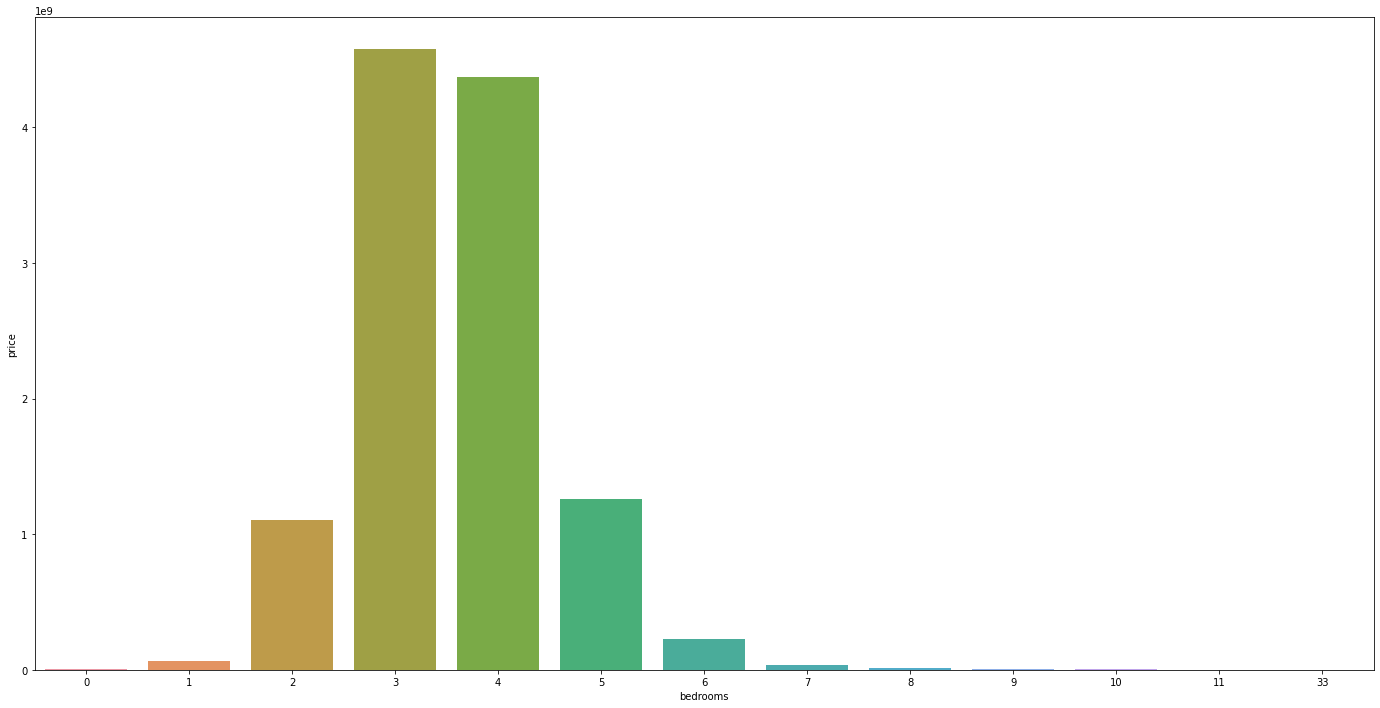

In [13]:
plt.figure( figsize=(24,12))
df = data[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );

## 3. Faça um gráfico de linhas que represente a média dos preços pelo ano construção dos imóveis.

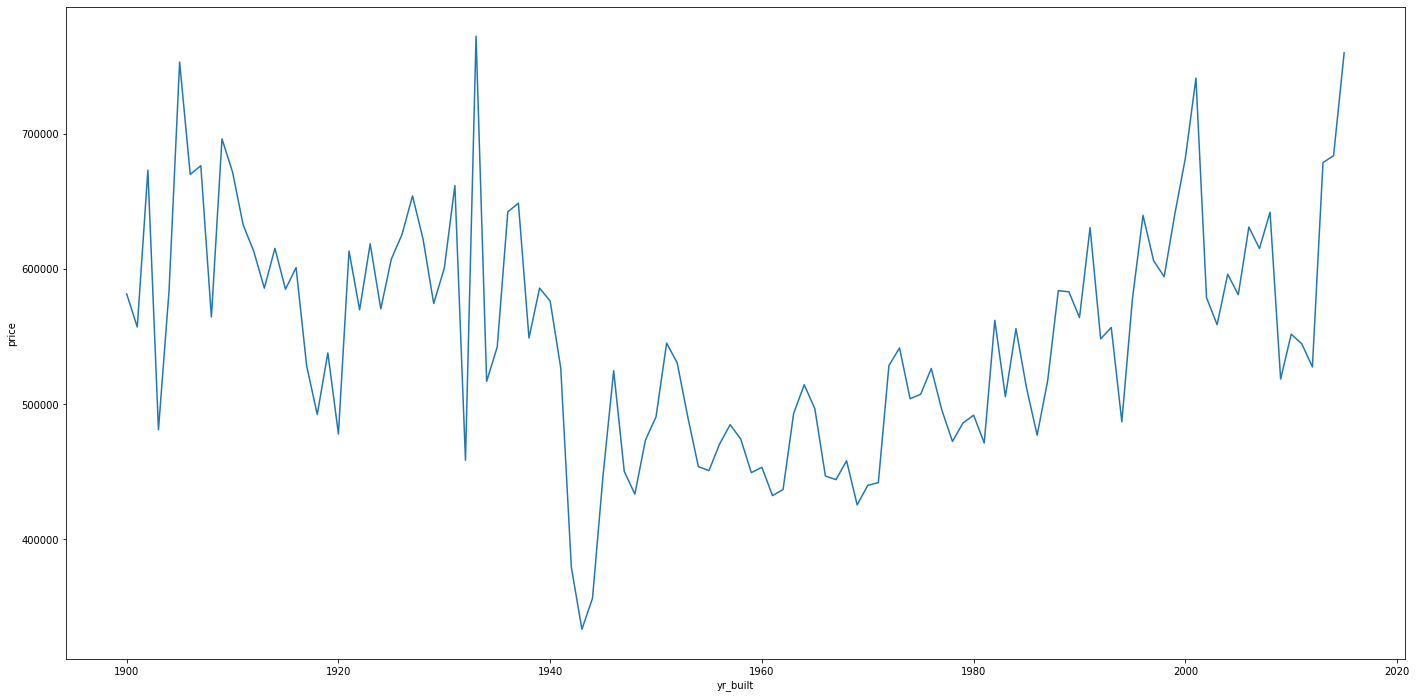

In [16]:
plt.figure( figsize=(24,12))
df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=df );

## 4. Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

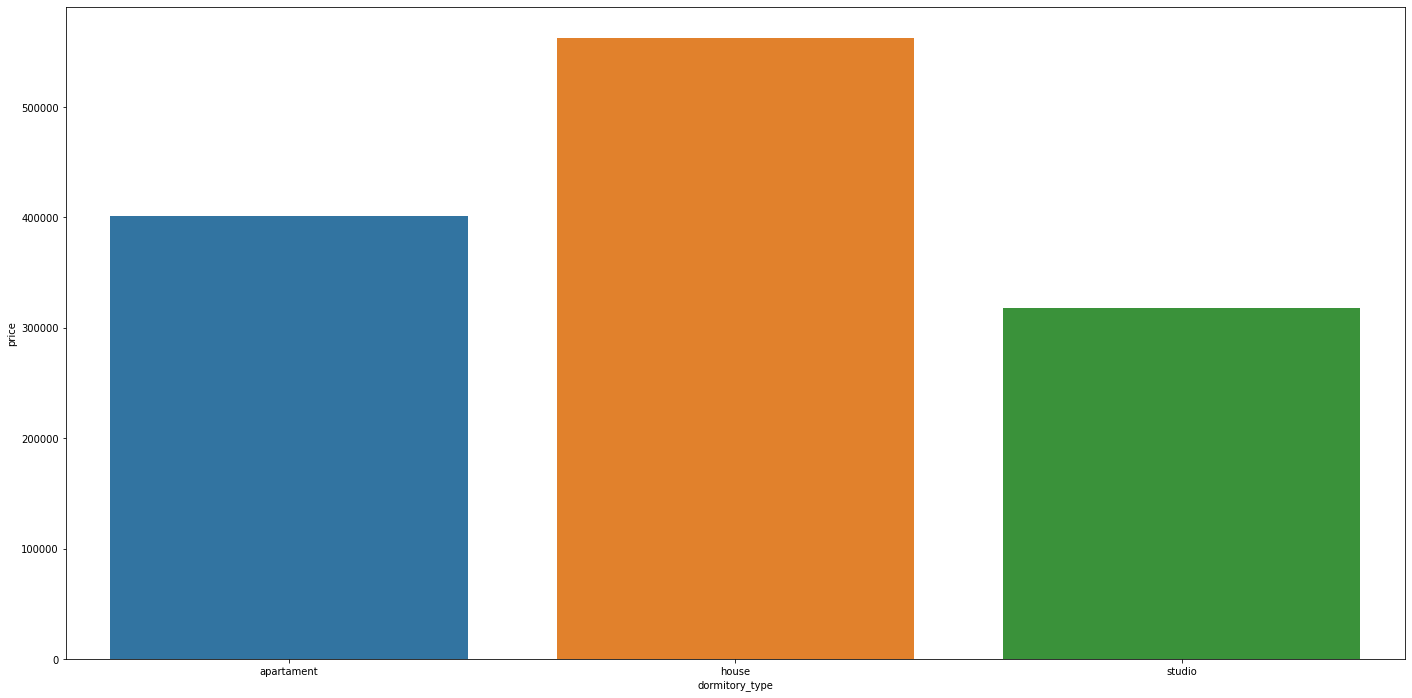

In [18]:
plt.figure( figsize=(24,12))
df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
sns.barplot( x='dormitory_type', y='price', data=df );

## 5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.


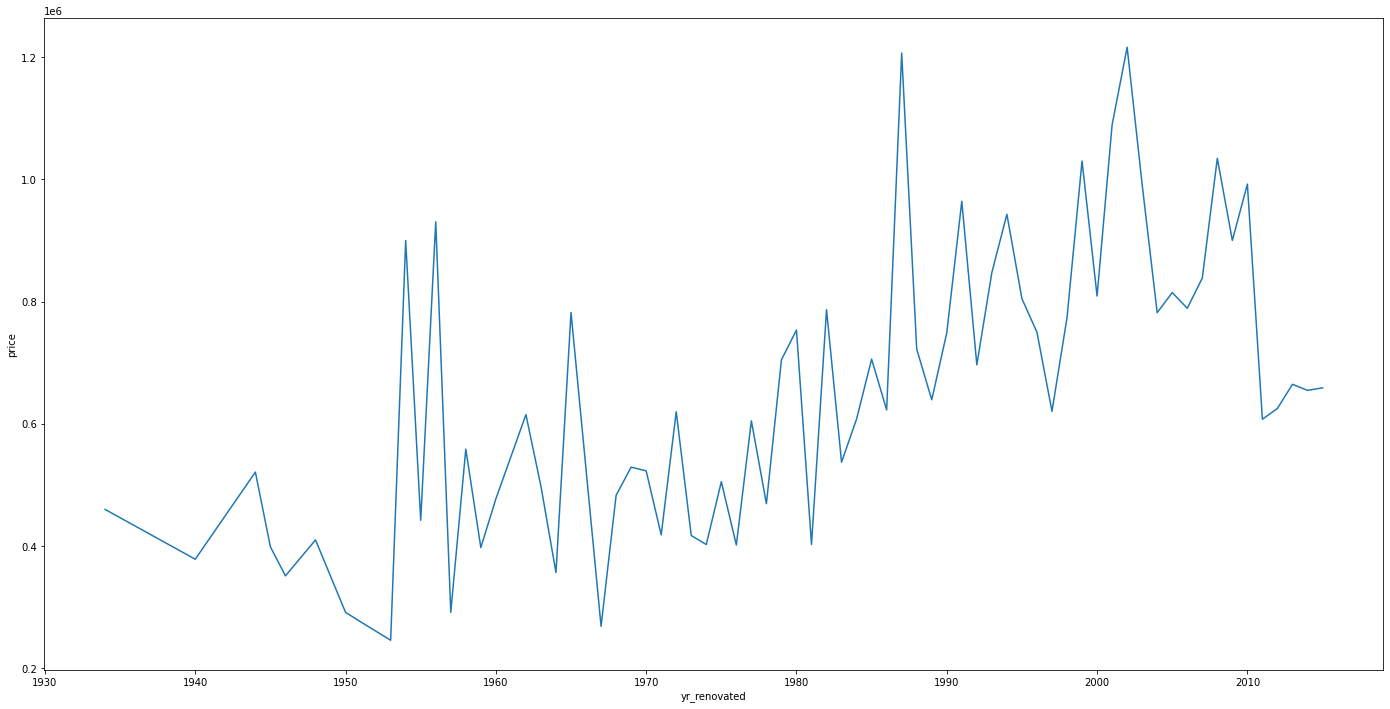

In [26]:
plt.figure( figsize=(24,12))
df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()
sns.lineplot( x='yr_renovated', y='price', data=df );

## 6. Faça um tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

In [27]:
df = data[['price', 'yr_built', 'dormitory_type']].groupby( ['yr_built', 'dormitory_type'] ).mean().reset_index()
df.head()

,yr_built,dormitory_type,price
0,1900,apartament,589533.33
1,1900,house,584854.27
2,1900,studio,398944.00
3,1901,apartament,452856.40
4,1901,house,578619.17


## 7. Crie um Dashboard com os gráficos das questões 02, 03, 04 ( Dashboard: 1 Linha e 2 colunas )

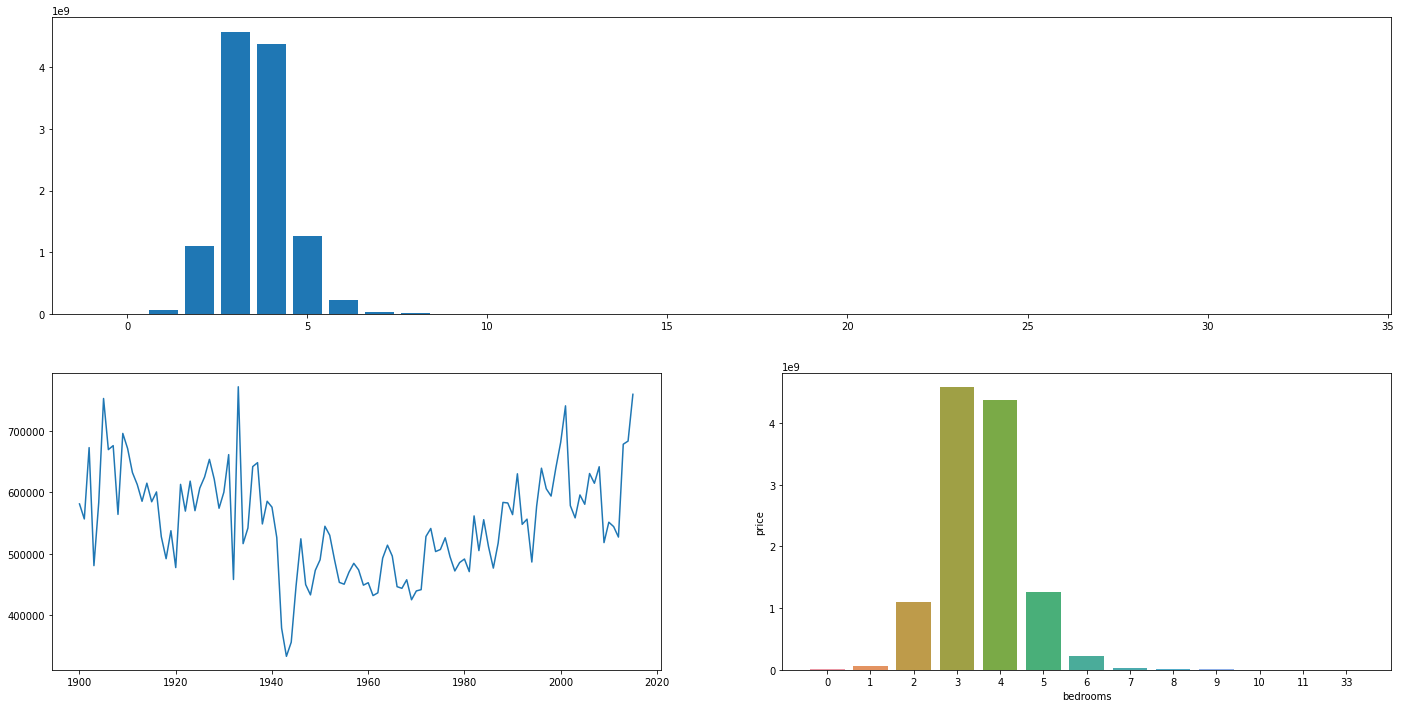

In [37]:
from matplotlib import gridspec

fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] ) # First Row
ax2 = fig.add_subplot( specs[1, 0] ) # First Row First Column
ax3 = fig.add_subplot( specs[1, 1] ) # Second Row First Column

# Frist Graph
df = data[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );
ax1.bar( df['bedrooms'], df['price'] )

# Second Graph
df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
ax2.plot( df['yr_built'], df['price'] );

# Third Graph
df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
ax3.bar( df['dormitory_type'], df['price'] );

## 8. Crie um Dashboard com os gráficos das perguntas 02, 04 ( Dashboard: 2 colunas )

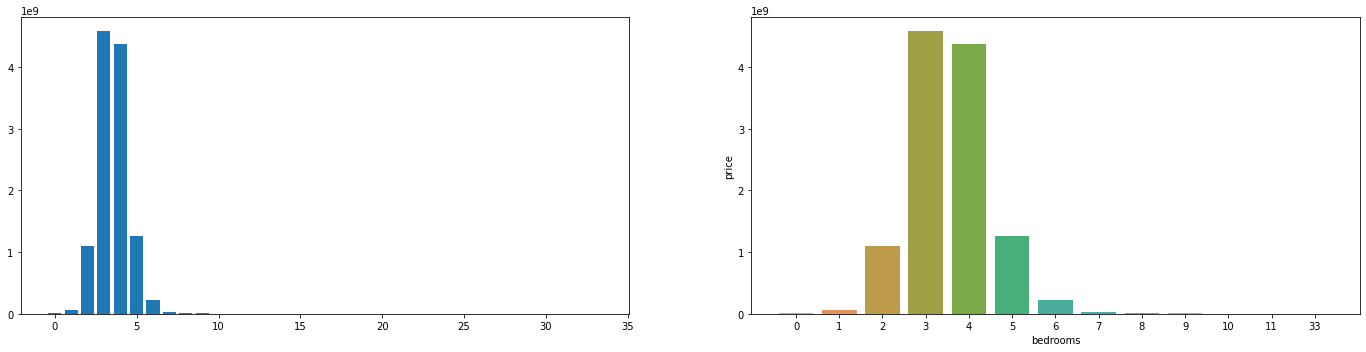

In [40]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[0, 1] ) # Second Row First Column

# Frist Graph
df = data[['price', 'bedrooms']].groupby( 'bedrooms' ).sum().reset_index()
sns.barplot( x='bedrooms', y='price', data=df );
ax1.bar( df['bedrooms'], df['price'] )

# Second Graph
df = data[['price', 'dormitory_type']].groupby( 'dormitory_type' ).mean().reset_index()
ax2.bar( df['dormitory_type'], df['price'] );

## 9. Crie um Dashboard com os gráficos das perguntas 03, 05 ( Dashboard: 2 Linhas )

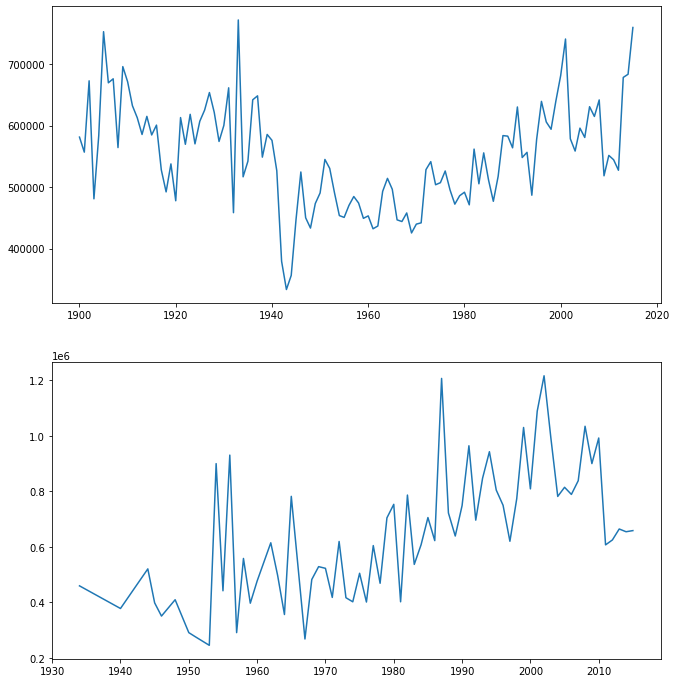

In [45]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[1, 0] ) # Second Row First Column

# Frist Graph
df = data[['price', 'yr_built']].groupby( 'yr_built' ).mean().reset_index()
ax1.plot( df['yr_built'], df['price'] );

# Second Graph
df = data.loc[data['yr_renovated'] > 1930, ['price', 'yr_renovated']].groupby( 'yr_renovated' ).mean().reset_index()
ax2.plot( df['yr_renovated'], df['price'] );

## 10. Faça um gráfico com o tamanho dos pontos sendo igual ao tamanho da sala de estar 

In [56]:
houses = data[['id', 'lat', 'long', 'price', 'sqft_living']].copy()


# define level of prices
houses['level'] = houses['price'].apply( lambda x: 0 if x <= 321950 else
                                                   1 if (x > 321950 ) & ( x <= 450000 ) else
                                                   2 if (x > 450000 ) & ( x <= 645000 ) else 3 )
# convert level to astype
houses['level'] = houses['level'].astype( int )

fig = px.scatter_mapbox( houses, 
                         lat="lat", 
                         lon="long", 
                         color='level',
                         size="sqft_living",
                         color_continuous_scale=px.colors.cyclical.IceFire, 
                         size_max=15, 
                         zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()